# Collect cities from counties
We've identified counties that were affected by the hurricanes (stored [here](../../data/hurricane_data/hurricane_state_counties.tsv)), and we have a mapping of cities to counties (stored [here](../../data/geo_files/uscitiesv1.5.csv)). 

Let's get a list of **umambiguous** cities for all affected counties.

We define unambiguous as fulfilling one of the following criteria:

- has only 1 referent in the gazetteer of U.S. cities
- has a referent in the gazetteer of U.S. cities that is (1) located within the region of interest and (2) is the most populous referent in the gazetteer

In [2]:
import pandas as pd

## Load data

In [3]:
import re
well_formed_name_matcher = re.compile('[a-zA-Z\. ]+')
hurricane_counties = pd.read_csv('../../data/hurricane_data/hurricane_state_counties.tsv', sep='\t', index_col=False)
# clean up county names
hurricane_counties.loc[:, 'counties'] = hurricane_counties.loc[:, 'counties'].apply(lambda x: ','.join([well_formed_name_matcher.search(y).group(0).strip() for y in x.split(',')]))
hurricane_counties.loc[:, 'state'] = hurricane_counties.loc[:, 'state'].apply(str.strip)
# add state abbreviation because simpler
state_abbreves = {'Texas':'TX', 'Puerto Rico':'PR', 'Virgin Islands':'VI', 'Florida':'FL', 'Georgia':'GA', 'North Carolina':'NC', 'South Carolina':'SC'}
hurricane_counties.loc[:, 'state'] = hurricane_counties.loc[:, 'state'].apply(lambda x: state_abbreves[x])
display(hurricane_counties)
# flatten to 1 county/line
hurricane_county_flat = []
for idx, row in hurricane_counties.iterrows():
    counties_i = row.loc['counties'].split(',')
    df_i = pd.DataFrame(pd.Series(counties_i), columns=['county'])
    df_i.loc[:, 'hurricane'] = row.loc['hurricane']
    df_i.loc[:, 'state'] = row.loc['state']
    hurricane_county_flat.append(df_i)
hurricane_counties = pd.concat(hurricane_county_flat, axis=0)
display(hurricane_counties.head())

,hurricane,state,counties,website
0,Harvey,TX,"Aransas,Austin,Bastrop,Bee,Brazoria,Caldwell,C...",https://www.fema.gov/disaster/4332
1,Maria,PR,"Adjuntas,Aguada,Aguadilla,Aguas Buenas,Aibonit...",https://www.fema.gov/disaster/4339/
2,Maria,VI,"St. Croix,St. John,St. Thomas",https://www.fema.gov/disaster/4340
3,Michael,FL,"Bay,Calhoun,Franklin,Gadsden,Gulf,Holmes,Jacks...",https://www.fema.gov/disaster/4399
4,Michael,GA,"Baker,Calhoun,Clay,Crisp,Decatur,Dougherty,Ear...",https://www.fema.gov/disaster/4400
5,Irma,VI,"St. John,St. Thomas",https://www.fema.gov/disaster/4335
6,Irma,PR,"Canovanas,Catano,Culebra,Dorado,Fajardo,Loiza,...",https://www.fema.gov/disaster/4336
7,Irma,FL,"Alachua,Baker,Bradford,Brevard,Broward,Charlot...",https://www.fema.gov/disaster/4337
8,Florence,NC,"Anson,Beaufort,Bladen,Brunswick,Carteret,Chath...",https://www.fema.gov/disaster/4393
9,Florence,SC,"Chesterfield,Darlington,Dillon,Florence,George...",https://www.fema.gov/disaster/4394


,county,hurricane,state
0,Aransas,Harvey,TX
1,Austin,Harvey,TX
2,Bastrop,Harvey,TX
3,Bee,Harvey,TX
4,Brazoria,Harvey,TX


In [4]:
city_county_data = pd.read_csv('../../data/geo_files/uscitiesv1.5.csv', sep=',', index_col=False)
display(city_county_data.head(10))

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659
5,Telma,Telma,WA,Washington,53007,Chelan,47.8432,-120.8157,NaN,NaN,1.4,point,False,America/Los_Angeles,98826,1840037825
6,Kahlotus,Kahlotus,WA,Washington,53021,Franklin,46.6437,-118.5565,199.0,199.0,173.0,polygon,True,America/Los_Angeles,99335,1840018478
7,Mondovi,Mondovi,WA,Washington,53043,Lincoln,47.6813,-118.0164,NaN,NaN,9.4,point,False,America/Los_Angeles,99122,1840037576
8,Washtucna,Washtucna,WA,Washington,53001,Adams,46.7540,-118.3106,204.0,204.0,120.0,polygon,True,America/Los_Angeles,99371,1840022312
9,Pleasant Hill,Pleasant Hill,WA,Washington,53033,King,47.6154,-121.9096,NaN,NaN,25.8,point,False,America/Los_Angeles,98014,1840037805


In [ ]:
from unidecode import unidecode
geonames_data = pd.read_csv('/hg190/corpora/GeoNames/allCountriesSimplified.tsv', sep='\t', index_col=False)
geonames_data.loc[:, 'name_fixed'] = geonames_data.loc[:, 'name'].apply(lambda x: unidecode(x.lower()))
valid_countries = ['US', 'PR', 'VI']
geonames_data_US = geonames_data[geonames_data.loc[:, 'country'].isin(valid_countries)]
display(geonames_data.head())
# flatten to one unique alternate name per row?? why haven't we done this before??
geonames_data_flat = []
geo_attr = ['geonames_ID', 'latitude', 'longitude', 'feature_code', 'population', 'alternate_name_count']
geo_ctr = 0
for idx, d_i in geonames_data_US.iterrows():
    alt_names = d_i.loc['alternate_names']
    if(type(alt_names) is str):
        names_i = list(set([unidecode(x.lower()) for x in alt_names.split(',')]) | set([unidecode(d_i.loc['name'].lower())]))
    else:
        names_i = [unidecode(d_i.loc['name'].lower())]
    d_i_flat = pd.DataFrame(pd.Series(names_i), columns=['name'])
    d_i_flat = d_i_flat.assign(**{x : d_i.loc[x] for x in geo_attr})
    geonames_data_flat.append(d_i_flat)
    if(geo_ctr % 10000 == 0):
        print('processed %d/%d entries'%(geo_ctr, geonames_data_US.shape[0]))
    geo_ctr += 1
geonames_data_flat = pd.concat(geonames_data_flat, axis=0)
print('%d flat GeoNames samples'%(geonames_data_flat.shape[0]))

,geonames_ID,name,alternate_names,latitude,longitude,feature_class,feature_code,country,population,alternate_name_count,name_fixed
0,2986043,Pic de Font Blanca,"Pic de Font Blanca,Pic du Port",42.64991,1.53335,T,PK,AD,0,2,pic de font blanca
1,2994701,Roc Mélé,"Roc Mele,Roc Meler,Roc Mélé",42.58765,1.74028,T,MT,AD,0,3,roc mele
2,3007683,Pic des Langounelles,Pic des Langounelles,42.61203,1.47364,T,PK,AD,0,1,pic des langounelles
3,3017832,Pic de les Abelletes,"Pic de la Font-Negre,Pic de la Font-Nègre,Pic ...",42.52535,1.73343,T,PK,AD,0,3,pic de les abelletes
4,3017833,Estany de les Abelletes,"Estany de les Abelletes,Etang de Font-Negre,Ét...",42.52915,1.73362,H,LK,AD,0,3,estany de les abelletes


processed 0/2243560 entries
processed 10000/2243560 entries
processed 20000/2243560 entries
processed 30000/2243560 entries
processed 40000/2243560 entries
processed 50000/2243560 entries
processed 60000/2243560 entries
processed 70000/2243560 entries
processed 80000/2243560 entries
processed 90000/2243560 entries
processed 100000/2243560 entries
processed 110000/2243560 entries
processed 120000/2243560 entries
processed 130000/2243560 entries
processed 140000/2243560 entries
processed 150000/2243560 entries
processed 160000/2243560 entries
processed 170000/2243560 entries
processed 180000/2243560 entries
processed 190000/2243560 entries
processed 200000/2243560 entries
processed 210000/2243560 entries
processed 220000/2243560 entries
processed 230000/2243560 entries
processed 240000/2243560 entries
processed 250000/2243560 entries
processed 260000/2243560 entries
processed 270000/2243560 entries
processed 280000/2243560 entries
processed 290000/2243560 entries
processed 300000/2243560

In [7]:
## save for later!!
geonames_data_flat.to_csv('/hg190/corpora/GeoNames/geonames_US_flat.gz', sep='\t', index=False, compression='gzip')

## Map hurricane -> counties -> cities -> unambiguous cities

Let's get all cities that were affected by a hurricane $C$, then filter to only cities $C'$ that are (1) unambiguous on a global scale or (2) have a location $l$ in the list of possible locations $L$ that falls within region of interest and has the highest population/names out of all possible locations. E.g. we keep `Houston` for `harvey` even though it is ambiguous because the highest population `Houston` falls in the region of interest.

In [44]:
from unidecode import unidecode
city_county_data = city_county_data.assign(**{'city_fixed': city_county_data.loc[:, 'city'].apply(lambda x: unidecode(x.lower()))})

In [90]:
city_feat_codes = set(['PPL', 'PPLA', 'PPLA2', 'ADM1', 'ADM2', 'ADM3', 'ADM4', 'PPLL', 'PPLS', 'PPLG', 'PPLC', 'PPLX', 'SCH', 'CH', 'BLDG', 'CMTY', 'LCTY', 'ISL'])
# city_feat_codes = set(['PPL', 'PPLA', 'PPLA2', 'PPLL', 'PPLS', 'PPLG', 'PPLG', 'PPLX', 'CMTY', 'LCTY'])
geonames_data_flat_city = geonames_data_flat[geonames_data_flat.loc[:, 'feature_code'].isin(city_feat_codes)]
# get approximate lat/lon to deduplicate candidates (e.g. Vega Alta as administrative seat / county)
geonames_data_flat_city.loc[:, 'latitude_approx'] = geonames_data_flat_city.loc[:, 'latitude'].apply(lambda x: round(x, 1))
geonames_data_flat_city.loc[:, 'longitude_approx'] = geonames_data_flat_city.loc[:, 'longitude'].apply(lambda x: round(x, 1))

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [162]:
def valid_city(city_name, geonames_city_data_full, data_name, importance_metric='population'):
    """
    Determine if city is valid.
    1. Is city unambiguous? If yes, return true
    2. Is the most important city by this name contained in the data? If yes, return true
    3. Otherwise return false
    """
    geonames_city_data_matches = geonames_city_data_full[geonames_city_data_full.loc[:, 'name']==city_name].drop_duplicates('geonames_ID', inplace=False)
    if(geonames_city_data_matches.shape[0] == 0):
        return False
    elif(geonames_city_data_matches.shape[0] == 1):
        return True
    else:
        geonames_city_data_matches.sort_values(importance_metric, inplace=True, ascending=False)
#         display(geonames_city_data_matches.head())
        if(geonames_city_data_matches.shape[0] == 0):
            print('error with city name %s'%(city_name))
        top_match = geonames_city_data_matches.iloc[0, :]
        return top_match.loc['%s_contains'%(data_name)]

In [168]:
## lat1, lat2, lon1, lon2
DATA_LOC_BOXES = {
    'florence' : [[31.0,36.6], [-85.0,-76.6]],
    'harvey' : [[26.7,36.3], [-105.1,-89.9]],
    'irma' : [[25.5,34.4], [-88.1,-79.0]],
#     'maria' : [[17.8,18.5], [-67.4,-65.1]], # PR only
    'maria' : [[17.6, 18.5], [-67.4, -64.3]],# PR + VI
    'michael' : [[24.7,34.9], [-88.3,-75.3]],
}
for k,v in DATA_LOC_BOXES.items():
    (lat_1, lat_2), (lon_1, lon_2) = v
    geonames_data_flat_city = geonames_data_flat_city.assign(**{'%s_contains'%(k) : geonames_data_flat_city.apply(lambda x: (x.loc['latitude'] >= lat_1) & (x.loc['latitude'] <= lat_2) & (x.loc['longitude'] >= lon_1) & (x.loc['longitude'] <= lon_2), axis=1)})

In [217]:
## test with Houston//harvey vs. Houston//maria
city_name = 'houston'
data_name = 'harvey'
print(valid_city(city_name, geonames_data_flat_city, data_name, importance_metric='population'))
city_name = 'houston'
data_name = 'maria'
print(valid_city(city_name, geonames_data_flat_city, data_name, importance_metric='population'))
city_name = 'frederiksted'
data_name = 'maria'
print(valid_city(city_name, geonames_data_flat_city, data_name, importance_metric='population'))
city_name = 'gainesville'
data_name = 'michael'
print(valid_city(city_name, geonames_data_flat_city, data_name, importance_metric='population'))

True
False
True
True


In [257]:
%%capture city_filter_output
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import re
import numpy as np
from unidecode import unidecode
# remove suffixes from city names
PR_MATCHER = re.compile('zona urbana$|comunidad$')
def clean_name(x):
    x = PR_MATCHER.sub('', x).strip()
    return x

hurricane_cities_complete = []
hurricane_cities_valid = []
city_county_data.loc[:, 'county_name'] = city_county_data.loc[:, 'county_name'].apply(unidecode)
for (hurricane_name_i, state_name_i), data_i in hurricane_counties.groupby(['hurricane', 'state']):
    hurricane_name_i = hurricane_name_i.lower()
    print('processing data %s'%(hurricane_name_i))
    county_i = set(data_i.loc[:, 'county'].values)
    city_county_data_i = city_county_data[(city_county_data.loc[:, 'state_id']==state_name_i) &
                                          (city_county_data.loc[:, 'county_name'].isin(county_i))]
    print('%d valid cities'%(city_county_data_i.shape[0]))
    display(city_county_data_i.head())
    ## add to complete data for later records if needed
    hurricane_cities_complete_i = city_county_data_i.loc[:, ['state_id', 'county_name', 'city', 'city_fixed']]
    hurricane_cities_complete_i = hurricane_cities_complete_i.assign(**{'hurricane_name' : hurricane_name_i})
    hurricane_cities_complete.append(hurricane_cities_complete_i)
    
    ## link to GeoNames data
    ## to determine ambiguity
    city_geo_data = []
    for city_j in city_county_data_i.loc[:, 'city_fixed']:
        city_data_j = geonames_data_flat_city[(geonames_data_flat_city.loc[:, 'name']==city_j)]
        # get rid of duplicates (e.g. county/city)
        city_data_j.drop_duplicates(['latitude_approx', 'longitude_approx'], inplace=True)
        if(city_data_j.shape[0] > 0):
            city_data_j.loc[:, 'name'] = city_data_j.loc[:, 'name'].apply(clean_name)            
            city_geo_data.append(city_data_j)
    name_coverage = len(city_geo_data) / city_county_data_i.loc[:, 'city_fixed'].nunique()*100
    print('name coverage = %.3f%%'%(name_coverage))
    if(len(city_geo_data) > 0):
        city_geo_data = pd.concat(city_geo_data, axis=0)
        # get rid of duplicates??
        city_geo_data.drop_duplicates(['name', 'latitude_approx', 'longitude_approx'], inplace=True)
        city_geo_counts = city_geo_data.loc[:, 'name'].value_counts()
        bins = max(1, city_geo_counts.max() - city_geo_counts.min())
        plt.hist(city_geo_counts, bins=bins)
        city_geo_counts_1 = city_geo_counts[city_geo_counts==1]
#         city_name_candidates = list(city_geo_counts_1.index)
        city_name_candidates = list(city_geo_counts.index)
        print('%.3f%% cities with geonames_count=1'%(len(city_geo_counts_1.index)/len(city_geo_counts)*100))
        plt.show()
        ## filter valid cities based on unambiguous/most popular candidate is in region
        # removes all Hurricane Maria candidates
        city_name_candidates_valid = [x for x in city_name_candidates if valid_city(x, geonames_data_flat_city, hurricane_name_i, importance_metric='population')]
        print('%d valid cities after filtering'%(len(city_name_candidates_valid)))
        print('removed city examples: %s'%(','.join(list(set(city_name_candidates)-set(city_name_candidates_valid))[:10])))
        hurricane_cities_valid += [(hurricane_name_i, state_name_i, x) for x in city_name_candidates_valid]
hurricane_cities_complete = pd.concat(hurricane_cities_complete, axis=0)
hurricane_cities_complete.index = np.arange(hurricane_cities_complete.shape[0])
hurricane_cities_valid = pd.DataFrame(hurricane_cities_valid, columns=['hurricane', 'state', 'city'])

In [256]:
hurricane_cities_complete_1 = pd.concat([x.assign(**{'hurricane_name':x.columns[-1]}).drop(x.columns[-1], axis=1) for x in hurricane_cities_complete], axis=0)
display(hurricane_cities_complete_1.head())
display(hurricane_cities_complete_1.loc[:, 'hurricane_name'].value_counts())

,state_id,county_name,city,city_fixed,hurricane_name
0,WA,Pierce,Prairie Ridge,prairie ridge,florence
1,WA,Skagit,Edison,edison,florence
2,WA,Lewis,Packwood,packwood,florence
3,WA,Kitsap,Wautauga Beach,wautauga beach,florence
4,WA,Kitsap,Harper,harper,florence


irma        113526
michael      75684
florence     75684
maria        75684
harvey       37842
Name: hurricane_name, dtype: int64

processing data florence
373 valid cities
name coverage = 100.000%
30.563% cities with geonames_count=1
231 valid cities after filtering
removed city examples: washington,robbins,longwood,gloucester,sanford,pikeville,hillsborough,prospect,hoffman,maple hill
processing data florence
71 valid cities
name coverage = 100.000%
25.352% cities with geonames_count=1
44 valid cities after filtering
removed city examples: marlboro,jefferson,clio,marion,garden city,tatum,georgetown,homewood,conway,chesterfield
processing data harvey
529 valid cities
name coverage = 100.000%
39.887% cities with geonames_count=1
346 valid cities after filtering
removed city examples: shelby,honey island,cleveland,fostoria,dickinson,magnolia beach,rockland,butler,carlos,woodville
processing data irma
852 valid cities
name coverage = 100.000%
45.070% cities with geonames_count=1
619 valid cities after filtering
removed city examples: bell,cleveland,providence,roseland,ona,sunnyside,plains,odessa,berkeley,kingsley
pro

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
9489,Four Oaks,Four Oaks,NC,North Carolina,37101,Johnston,35.4503,-78.4177,2082.0,2082.0,495.0,polygon,True,America/New_York,27524,1840016291,four oaks
9494,Goldston,Goldston,NC,North Carolina,37037,Chatham,35.5929,-79.3284,293.0,293.0,142.0,polygon,True,America/New_York,27252,1840016258,goldston
9500,Snow Hill,Snow Hill,NC,North Carolina,37079,Greene,35.4506,-77.6769,1526.0,1526.0,382.0,polygon,True,America/New_York,28580,1840017829,snow hill
9504,Saint Helena,Saint Helena,NC,North Carolina,37141,Pender,34.5166,-77.9174,424.0,424.0,29.0,polygon,True,America/New_York,28425,1840017926,saint helena
9506,Verona,Verona,NC,North Carolina,37133,Onslow,34.6696,-77.4716,NaN,NaN,261.5,point,False,America/New_York,28540,1840032893,verona


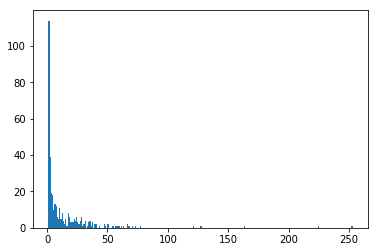

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
35418,Lake City,Lake City,SC,South Carolina,45041,Florence,33.8676,-79.7533,8489.0,6670.0,482.0,polygon,True,America/New_York,29560,1840014715,lake city
35427,Scranton,Scranton,SC,South Carolina,45041,Florence,33.9174,-79.7441,827.0,827.0,402.0,polygon,True,America/New_York,29591,1840017961,scranton
35436,Chesterfield,Chesterfield,SC,South Carolina,45025,Chesterfield,34.7330,-80.0780,1429.0,1429.0,136.0,polygon,True,America/New_York,29709,1840016583,chesterfield
35438,Longs,Longs,SC,South Carolina,45051,Horry,33.9385,-78.7331,NaN,NaN,38.3,point,False,America/New_York,29568,1840035808,longs
35439,North Hartsville,North Hartsville,SC,South Carolina,45031,Darlington,34.4011,-80.0710,NaN,NaN,345.2,polygon,False,America/New_York,29550,1840013609,north hartsville


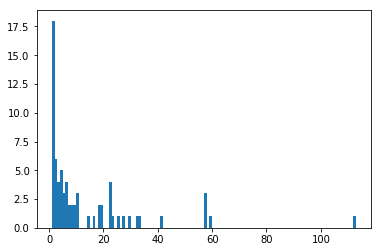

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
6239,Pleasant Hill,Pleasant Hill,TX,Texas,48373,Polk,31.0033,-94.7936,NaN,NaN,102.8,polygon,False,America/Chicago,75939,1840025987,pleasant hill
6243,Leggett,Leggett,TX,Texas,48373,Polk,30.8180,-94.8705,NaN,NaN,47.7,point,False,America/Chicago,77351,1840036483,leggett
6245,Taylor Landing,Taylor Landing,TX,Texas,48245,Jefferson,29.8641,-94.1348,243.0,243.0,89.0,polygon,True,America/Chicago,77705,1840022196,taylor landing
6246,Liverpool,Liverpool,TX,Texas,48039,Brazoria,29.3016,-95.2745,519.0,519.0,183.0,polygon,True,America/Chicago,77577 77511,1840020975,liverpool
6248,Monroe City,Monroe City,TX,Texas,48071,Chambers,29.7849,-94.5852,NaN,NaN,3.5,point,False,America/Chicago,77514,1840036290,monroe city


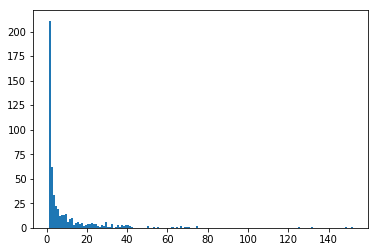

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
3367,Lake Panasoffkee,Lake Panasoffkee,FL,Florida,12119,Sumter,28.7878,-82.1318,NaN,NaN,20.8,polygon,False,America/New_York,33538,1840014066,lake panasoffkee
3368,Alachua,Alachua,FL,Florida,12001,Alachua,29.7780,-82.4827,4533.0,9982.0,109.0,polygon,True,America/New_York,32615 32616 32653,1840014020,alachua
3370,Ochopee,Ochopee,FL,Florida,12021,Collier,25.9015,-81.3034,NaN,NaN,0.9,point,False,America/New_York,34141,1840023571,ochopee
3372,Bushnell,Bushnell,FL,Florida,12119,Sumter,28.6859,-82.1159,4497.0,3107.0,104.0,polygon,True,America/New_York,33513 33538 33585,1840014067,bushnell
3374,Campville,Campville,FL,Florida,12001,Alachua,29.6664,-82.1184,NaN,NaN,12.4,point,False,America/New_York,32640,1840028865,campville


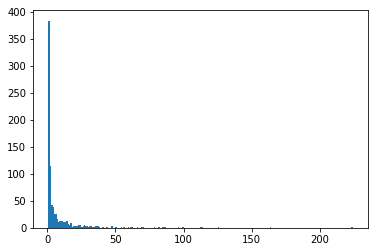

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
17313,Suárez Comunidad,Suarez Comunidad,PR,Puerto Rico,72087,Loiza,18.4311,-65.8514,NaN,NaN,2403.7,polygon,False,America/Puerto_Rico,00772,1630035584,suarez comunidad
17322,Benítez Comunidad,Benitez Comunidad,PR,Puerto Rico,72029,Canovanas,18.2725,-65.8788,NaN,NaN,1171.9,polygon,False,America/Puerto_Rico,00729,1630023715,benitez comunidad
17332,Levittown,Levittown,PR,Puerto Rico,72137,Toa Baja,18.4454,-66.1759,NaN,NaN,4820.9,polygon,False,America/Puerto_Rico,00949,1630023685,levittown
17335,Candelaria Comunidad,Candelaria Comunidad,PR,Puerto Rico,72137,Toa Baja,18.4043,-66.2175,NaN,NaN,1258.4,polygon,False,America/Puerto_Rico,00949,1630035634,candelaria comunidad
17338,Levittown Comunidad,Levittown Comunidad,PR,Puerto Rico,72137,Toa Baja,18.4454,-66.1759,NaN,NaN,4820.9,polygon,False,America/Puerto_Rico,00949,1630035506,levittown comunidad


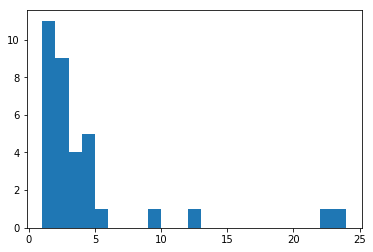

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
18424,Charlotte Amalie,Charlotte Amalie,VI,Virgin Islands,78030,St. Thomas,18.3419,-64.9332,NaN,NaN,1595.9,polygon,True,America/St_Thomas,00802,1850037473,charlotte amalie
18426,Cruz Bay,Cruz Bay,VI,Virgin Islands,78020,St. John,18.3260,-64.7792,NaN,NaN,345.6,polygon,False,America/St_Thomas,00830 00831,1850037476,cruz bay
18427,Coral Bay,Coral Bay,VI,Virgin Islands,78020,St. John,18.3453,-64.7185,NaN,NaN,113.9,polygon,False,America/St_Thomas,00830,1850037475,coral bay
18428,Tutu,Tutu,VI,Virgin Islands,78030,St. Thomas,18.3405,-64.8884,NaN,NaN,1514.8,polygon,False,America/St_Thomas,00802,1850037478,tutu


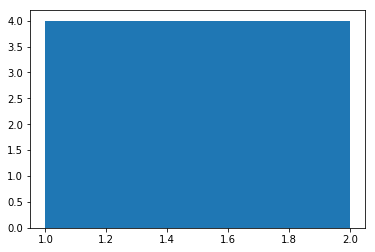

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
17310,Central Aguirre,Central Aguirre,PR,Puerto Rico,72123,Salinas,17.9559,-66.2264,NaN,NaN,354.5,polygon,False,America/Puerto_Rico,00704,1630023632,central aguirre
17311,Morovis,Morovis,PR,Puerto Rico,72101,Morovis,18.3269,-66.4058,NaN,NaN,1975.8,polygon,False,America/Puerto_Rico,00687,1630023611,morovis
17312,La Fermina Comunidad,La Fermina Comunidad,PR,Puerto Rico,72069,Humacao,18.1744,-65.8527,NaN,NaN,1042.2,polygon,False,America/Puerto_Rico,00771 00791,1630035696,la fermina comunidad
17313,Suárez Comunidad,Suarez Comunidad,PR,Puerto Rico,72087,Loiza,18.4311,-65.8514,NaN,NaN,2403.7,polygon,False,America/Puerto_Rico,00772,1630035584,suarez comunidad
17314,Lajas Zona Urbana,Lajas Zona Urbana,PR,Puerto Rico,72079,Lajas,18.0452,-67.0583,NaN,NaN,316.1,polygon,False,America/Puerto_Rico,00667,1630035498,lajas zona urbana


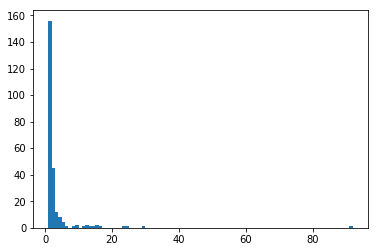

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
18424,Charlotte Amalie,Charlotte Amalie,VI,Virgin Islands,78030,St. Thomas,18.3419,-64.9332,NaN,NaN,1595.9,polygon,True,America/St_Thomas,00802,1850037473,charlotte amalie
18425,Frederiksted,Frederiksted,VI,Virgin Islands,78010,St. Croix,17.7122,-64.8812,NaN,NaN,748.0,polygon,True,America/St_Thomas,00841 00840,1850037477,frederiksted
18426,Cruz Bay,Cruz Bay,VI,Virgin Islands,78020,St. John,18.3260,-64.7792,NaN,NaN,345.6,polygon,False,America/St_Thomas,00830 00831,1850037476,cruz bay
18427,Coral Bay,Coral Bay,VI,Virgin Islands,78020,St. John,18.3453,-64.7185,NaN,NaN,113.9,polygon,False,America/St_Thomas,00830,1850037475,coral bay
18428,Tutu,Tutu,VI,Virgin Islands,78030,St. Thomas,18.3405,-64.8884,NaN,NaN,1514.8,polygon,False,America/St_Thomas,00802,1850037478,tutu


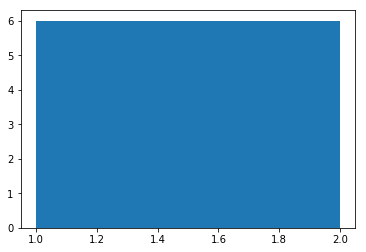

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
3371,Pretty Bayou,Pretty Bayou,FL,Florida,12005,Bay,30.1975,-85.6974,NaN,NaN,739.7,polygon,False,America/Chicago,32405,1840029069,pretty bayou
3373,Apalachicola,Apalachicola,FL,Florida,12037,Franklin,29.7282,-84.9940,3798.0,2296.0,461.0,polygon,True,America/New_York,32320 32329,1840014015,apalachicola
3379,Sumatra,Sumatra,FL,Florida,12077,Liberty,30.0230,-84.9825,NaN,NaN,138.7,polygon,False,America/New_York,32321 32335,1840026013,sumatra
3380,Bonifay,Bonifay,FL,Florida,12059,Holmes,30.7828,-85.6846,4121.0,2722.0,257.0,polygon,True,America/Chicago,32425,1840013924,bonifay
3381,Indian Pass,Indian Pass,FL,Florida,12045,Gulf,29.6905,-85.2644,NaN,NaN,19.9,point,False,America/New_York,32456,1840028887,indian pass


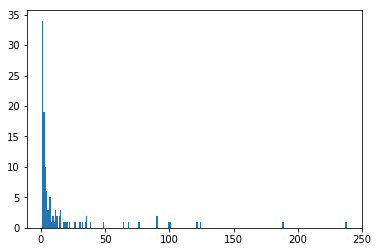

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,city_fixed
22166,Edison,Edison,GA,Georgia,13037,Calhoun,31.5608,-84.7374,1468.0,1468.0,242.0,polygon,True,America/New_York,39846,1840013867,edison
22167,Faceville,Faceville,GA,Georgia,13087,Decatur,30.7532,-84.6399,NaN,NaN,33.2,point,False,America/New_York,39819,1840029137,faceville
22170,Blakely,Blakely,GA,Georgia,13099,Early,31.3827,-84.9228,3443.0,4656.0,102.0,polygon,True,America/New_York,39823,1840013872,blakely
22173,Sumner,Sumner,GA,Georgia,13321,Worth,31.5103,-83.7369,404.0,404.0,88.0,polygon,True,America/New_York,31781 31789,1840017062,sumner
22190,Montrose,Montrose,GA,Georgia,13175,Laurens,32.5595,-83.1535,209.0,209.0,49.0,polygon,True,America/New_York,31065,1840016972,montrose


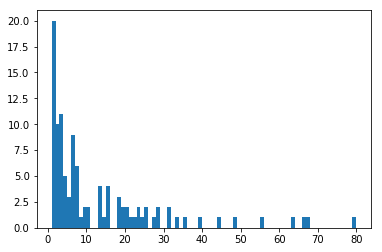

In [203]:
city_filter_output.show()

In [ ]:
print(hurricane_cities_complete[:10])

In [ ]:
# save complete names for possible use later
data_dir = '../../data/hurricane_data/'
hurricane_cities_complete.to_csv(os.path)

In [214]:
import os
# write names to file
data_dir = '../../data/hurricane_data/'
non_cities = []
for data_name_i, data_i in hurricane_cities_valid.groupby('hurricane'):
    # make .tsv for annotation of valid/invalid city
    out_file_name = os.path.join(data_dir, '%s_affected_cities.tsv'%(data_name_i))
    cities_i = sorted(data_i.loc[:, 'city'].values)
    print(data_name_i)
    print(cities_i)
    with open(out_file_name, 'w') as out_file:
        out_file.write('\n'.join(cities_i))

florence
['abbottsburg', 'angier', 'ansonville', 'archer lodge', 'ashley heights', 'atkinson', 'autryville', 'ayden', 'aynor', 'bahama', 'bald head island', 'barker ten mile', 'bayboro', 'beaufort', 'bell arthur', 'belville', 'belvoir', 'bennettsville', 'beulaville', 'bladenboro', 'blenheim', 'bogue', 'boiling spring lakes', 'bolivia', 'bonlee', 'bonnetsville', 'bowmore', 'briarcliffe acres', 'brices creek', 'brogden', 'buies creek', 'bunnlevel', 'burgaw', 'butters', 'calabash', 'calypso', 'cape carteret', 'carolina beach', 'carolina shores', 'carrboro', 'castle hayne', 'caswell beach', 'chadbourn', 'chapel hill', 'cheraw', 'cherry grove beach', 'chocowinity', 'clayton', 'coats', 'cove city', 'coward', 'darlington', 'delco', 'delway', 'dillon', 'dobbins heights', 'dundarrach', 'dunn', 'durham', 'east arcadia', 'east laurinburg', 'east rockingham', 'eastover', 'effingham', 'efland', 'ellerbe', 'elm city', 'elrod', 'elroy', 'emerald isle', 'engelhard', 'ernul', 'erwin', 'fair bluff', 'fa

Which cities did we remove?

In [210]:
# which cities did we actually remove??
for hurricane_name_i, data_i in hurricane_counties.groupby('hurricane'):
    state_names_i = data_i.loc[:, 'state'].unique()
    hurricane_name_i = hurricane_name_i.lower()
    city_county_data.loc[:, 'county_name'] = city_county_data.loc[:, 'county_name'].apply(unidecode)
    original_cities_i = pd.concat([city_county_data[(city_county_data.loc[:, 'state_id']==state_name_i) & (city_county_data.loc[:, 'county_name'].isin(data_i[data_i.loc[:, 'state']==state_name_i].loc[:, 'county'].values))] for state_name_i in state_names_i], axis=0).loc[:, 'city'].apply(lambda x: clean_name(unidecode(x.lower()))).unique()
    hurricane_cities_valid_i = hurricane_cities_valid[hurricane_cities_valid.loc[:, 'hurricane']==hurricane_name_i].loc[:, 'city'].unique()
#     print('original cities %s'%(','.join(sorted(original_cities_i))))
#     print('valid cities %s'%(','.join(sorted(hurricane_cities_valid_i))))
    missing_cities_i = set(original_cities_i) - set(hurricane_cities_valid_i)
    print('hurricane %s has %d missing cities:\n%s'%(hurricane_name_i, len(missing_cities_i), ','.join(sorted(missing_cities_i))))

hurricane florence has 167 missing cities:
aberdeen,alliance,arapahoe,atlantic,atlantic beach,aurora,bath,bayshore,bayview,belfast,belhaven,bennett,benson,bethel,bethesda,black creek,boardman,bolton,bonnie doone,bridgeton,brightwood,broad creek,broadway,brunswick,bucksport,buie,bynum,cameron,carthage,cedar point,centenary,cerro gordo,chesterfield,chinquapin,clarkton,clinton,clio,colon,conway,cordova,cumberland,currie,davis,dixon,dover,dublin,elizabethtown,eureka,evergreen,fairfield,fairmont,fairview,falkland,farmville,florence,fountain,freeland,fremont,garden city,garland,georgetown,gibson,glendon,gloucester,gresham,gulf,hampstead,harkers island,haywood,hightsville,hillsborough,hoffman,homewood,ivanhoe,jacksonville,jamestown,jefferson,jerome,johnsonville,julian,kelly,la grange,lake city,lake park,lake view,lamar,laurel hill,ledbetter,linden,little rock,longs,longwood,lowland,lydia,magnolia,maple hill,marion,marlboro,marshville,maysville,mcdonald,midway park,monroe,morven,myrtle grove,n

Solution: manually remove all city names that could refer to larger entities (`bolivia`), people (`isabela`), or noun phrases (`el mango`).

Let's label the cities for being valid to mine  (1=valid, 0=invalid because ambiguity, common words, overlap with proper names).

After manual labelling, we dump the cities into separate phrase files for tweet mining.

In [226]:
data_dir = '../../data/hurricane_data/'
hurricane_names = hurricane_counties.loc[:, 'hurricane'].apply(str.lower).unique()
affected_city_files = [os.path.join(data_dir, '%s_affected_cities.tsv'%(h)) for h in hurricane_names]
for f in affected_city_files:
    f_new = f.replace('_affected_cities.tsv', '_location_phrases.txt')
    f_data = pd.read_csv(f, sep='\t', index_col=False, header=None)
    # restrict to valid cities
    f_data_valid = f_data[f_data.loc[:, 1]==1]
    print('%d/%d valid cities'%(f_data_valid.shape[0], f_data.shape[0]))
    with open(f_new, 'w') as f_new_out:
        f_new_out.write('\n'.join(f_data_valid.loc[:, 0].values))

194/346 valid cities
85/219 valid cities
55/125 valid cities
330/628 valid cities
154/274 valid cities


After mining, let's check the data!

In [259]:
import os
import gzip
import json
from functools import reduce
location_phrase_mined_data_files = [
    '../../data/mined_tweets/archive_florence_location_phrases_combined.gz',
    '../../data/mined_tweets/archive_harvey_location_phrases_combined.gz',
    '../../data/mined_tweets/archive_irma_location_phrases_combined.gz',
    '../../data/mined_tweets/archive_michael_location_phrases_combined.gz',
    '../../data/mined_tweets/archive_maria_location_phrases_combined.gz',
]
location_phrase_mined_data_files = [f for f in location_phrase_mined_data_files if os.path.exists(f)]
# count locations
location_phrase_mined_data  = []
phrase_mined_data_name_matcher = re.compile('(?<=archive_)\w+(?=_)')
for f in location_phrase_mined_data_files:
    f_data_name = phrase_mined_data_name_matcher.search(f).group(0)
    f_data = [json.loads(l.strip()) for l in gzip.open(f)]
    f_data = pd.concat([pd.Series(d) for d in f_data], axis=1).transpose()
    f_data = f_data.assign(**{'data_name' : f_data_name})
    print('%s has %d tweets'%(os.path.basename(f), len(f_data)))
    if(len(f_data) > 0):
        f_phrase_matches = pd.Series(list(reduce(lambda x,y: x+y, f_data.loc[:, 'phrase_match'].values)))
        display(f_phrase_matches.value_counts())
        location_phrase_mined_data.append(f_data)
location_phrase_mined_data = pd.concat(location_phrase_mined_data, axis=0)

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



archive_florence_location_phrases_combined.gz has 8695 tweets


wilmington             2402
new bern               1049
greensboro              923
myrtle beach            566
greenville              538
dillon                  536
fayetteville            534
wrightsville beach      376
lumberton               227
beaufort                186
chapel hill             174
high point              161
morehead city           104
newbern                  89
myrtlebeach              82
topsail beach            66
rockingham               66
north topsail beach      60
blenheim                 49
havelock                 45
north myrtle beach       42
ocracoke                 32
highpoint                31
effingham                30
wrightsvillebeach        29
swansboro                29
carrboro                 25
whiteville               22
belvoir                  21
oak island               20
                       ... 
kenansville               2
hollyridge                2
minnesott beach           2
elmcity                   2
ellerbe             

archive_harvey_location_phrases_combined.gz has 148389 tweets


houston                129028
port arthur              3208
rockport                 3016
corpus christi           2227
beaumont                 2139
nederland                2139
galveston                1416
quintana                  851
barrett                   824
pasadena                  776
cuero                     744
portarthur                722
devers                    497
friendswood               491
addicks                   460
brazoria                  399
pearland                  389
port aransas              382
baytown                   317
sinton                    281
corpuschristi             275
kingwood                  274
aransas pass              220
beasley                   204
texas city                199
hankamer                  180
deer park                 154
bastrop                   146
vidor                     120
bellaire                  118
                        ...  
hedwig village              2
holidaybeach                2
montbelvie

archive_irma_location_phrases_combined.gz has 24305 tweets


tampa                    6237
orlando                  6006
jacksonville             1794
fort lauderdale           974
oviedo                    960
palm beach                784
sarasota                  672
gainesville               485
fort myers                412
fortlauderdale            329
estero                    321
lakeland                  290
pineda                    242
lakeside                  237
rotonda                   231
seminole                  224
kissimmee                 202
clermont                  198
davie                     179
fortmyers                 153
daytona beach             141
boca raton                126
bradenton                 116
siestakey                 114
dunedin                   105
reddick                    96
cape coral                 91
solana                     91
gifford                    86
mascotte                   85
                         ... 
dadecity                    1
luraville                   1
ankona    

archive_michael_location_phrases_combined.gz has 1697 tweets


tallahassee       1160
apalachicola       135
lynn haven          82
sumter              36
dalkeith            35
leary               35
wakulla             30
colquitt            23
blountstown         23
bluffton            22
lynnhaven           19
chattahoochee       19
tifton              14
carrabelle          14
crawfordville       13
donalsonville       13
indian pass          9
whigham              7
wewahitchka          7
coverdale            7
port saint joe       6
acree                5
miccosukee           5
graceville           5
barwick              4
cottondale           3
econfina             3
highland view        2
portsaintjoe         2
sopchoppy            2
brewton              2
baconton             1
bayou george         1
grand ridge          1
dtype: int64

archive_maria_location_phrases_combined.gz has 43643 tweets


san juan             31142
benitez               1444
fajardo               1208
sanjuan               1094
arroyo                1003
utuado                 898
vieques                512
bayamon                464
caguas                 408
humacao                387
aguadilla              372
arecibo                337
guaynabo               295
aceitunas              291
aguada                 255
villalba               253
barceloneta            242
betances               240
yabucoa                234
martorell              212
catano                 193
mayaguez               183
boqueron               182
coqui                  181
guayama                180
bartolo                176
toa baja               173
barahona               159
canovanas              152
loiza                  146
                     ...  
penuelas                50
san german              49
naguabo                 45
maricao                 41
aibonito                40
trujillo alto           35
m

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



So far so good! No weird outliers as far as I can tell.

Can we get a sense of how relevant these tweets are with some sampling (equal probability across locations)?

In [260]:
location_phrase_mined_data.head()

,contributors,coordinates,created_at,data_name,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,retweet_count,retweeted,retweeted_status,scopes,source,text,timestamp_ms,truncated,user,withheld_in_countries
0,None,None,Wed Aug 29 08:37:15 +0000 2018,florence_location_phrases,NaN,"{'hashtags': [{'text': 'WinItWednesday', 'indi...",NaN,NaN,0,False,...,0,False,{'created_at': 'Wed Aug 29 08:35:39 +0000 2018...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @horseandhoof: #WinItWednesday August Priz...,1535531835659,False,"{'id': 3359073771, 'id_str': '3359073771', 'na...",NaN
1,None,None,Wed Aug 29 08:38:30 +0000 2018,florence_location_phrases,"[0, 98]","{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1034721944325816320, 'id_str...",NaN,0,False,...,0,False,NaN,NaN,"<a href=""http://www.autopo.st"" rel=""nofollow"">...",nowplaying dance clubbing soul RnB When We Wer...,1535531910666,False,"{'id': 711826025349517312, 'id_str': '71182602...",NaN
2,None,None,Wed Aug 29 08:47:09 +0000 2018,florence_location_phrases,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'british columbia browse white m...,0,False,...,0,False,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",british columbia browse white man houston http...,1535532429662,True,"{'id': 1029168609032105984, 'id_str': '1029168...",NaN
3,None,None,Wed Aug 29 09:08:19 +0000 2018,florence_location_phrases,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,...,0,False,{'created_at': 'Wed Aug 29 08:16:28 +0000 2018...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @KTFCOfficial: On this day in 1992 a goal f...,1535533699665,False,"{'id': 776460183258161152, 'id_str': '77646018...",NaN
4,None,None,Wed Aug 29 09:29:21 +0000 2018,florence_location_phrases,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'ray free porn before trailers n...,0,False,...,0,False,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ray free porn before trailers nasty https://t....,1535534961666,True,"{'id': 1029353311202418689, 'id_str': '1029353...",NaN


In [279]:
np.random.seed(123)
N_sample = 20
for data_name_i, data_i in location_phrase_mined_data.groupby('data_name'):
    phrase_match_counts_i = pd.Series(reduce(lambda x,y:x+y, data_i.loc[:, 'phrase_match'].values)).value_counts()
    phrase_match_counts_i = np.log(phrase_match_counts_i+1) # log-scale
    phrase_match_pct_i = phrase_match_counts_i / phrase_match_counts_i.sum()
    phrase_sample_i = np.random.choice(phrase_match_pct_i.index, size=N_sample, p=phrase_match_pct_i.values)
    data_i_phrase = [data_i[data_i.loc[:, 'phrase_match'].apply(lambda y: x in y)] for x in phrase_sample_i]
    data_i_phrase = [x.iloc[np.random.randint(x.shape[0]), :].loc['text'].replace('\n', '') for x in data_i_phrase]
#     data_i_sample = data_i.loc[np.random.choice(data_i.index, N_sample, replace=False), :]
    print('sample for %s'%(data_name_i))
    print('\n'.join(data_i_phrase))

sample for florence_location_phrases
RT @NWSWilmingtonNC: Flash Flood Warning including Wilmington NC, Murraysville NC, Leland NC until 6:15 AM EDT https://t.co/ywY5eNxiTI
RT @brendandelaney3: tornado by broadway at the beach @MBPDSC @MyrtleBeachGov @TrooperBob_SCHP @MyrtleBeachFire #MyrtleBeach https://t.co/H…
Só na caça...Who would have thought that noon would be the high point of my day? Join @coffeeMbagel to find out!
RT @oneduran: at #ChapelHill Community Policing Advisory Committee. CHPD not present per insistence of community members. Cmte Chair Darrel…
RT @favechracter: carol peletier || the walking dead http://t.co/OHJXKQFdot
If you're looking for work in #Carrboro, NC, check out this #job: https://t.co/YiwwIW1TYM #KellyJobs #KellyServices… https://t.co/HwlUYK5aUL
RT @LeeFootballFans: East Rockingham    13Robert E. Lee              3  Half#LTC2018
#RadioAd The Best Prices For Rims And Tires 704-244-0127 Southern Styles Tires n Rims, Wadesboro, NC https://t.co/jSzxxdEVzU
Well t

Relevant tweets per sample:

- **Florence**: 6/20
- **Harvey**: 8/20
- **Irma**: 10/20
- **Maria**: 5/20
- **Michael**: 6/20

Yikes. This means that we will probably have to restrict our analysis to the most populous cities in each set to avoid ambiguity and irrelevant information.

Now let's run some NER and extract the locations.

After doing that, we have some tags. Let's restrict to valid locations and look at the some sample tweets.

In [281]:
combined_tweet_data_tags = pd.read_csv('../../data/mined_tweets/combined_location_phrase_tweet_tag_data_NE_flat.gz', sep='\t', index_col=False, compression='gzip')
display(combined_tweet_data_tags.head())
# restrict to loc
combined_tweet_data_loc = combined_tweet_data_tags[combined_tweet_data_tags.loc[:, 'valid_loc']]
print('%d/%d valid locs'%(combined_tweet_data_loc.shape[0], combined_tweet_data_tags.shape[0]))

,id,txt,data_name_fixed,username,date,lang,NE,NE_type,NE_LOC,valid_loc,has_descriptor,NE_fixed
0,1034721630889631744,RT @horseandhoof: #WinItWednesday August Priz...,florence,Pooch123456,2018-08-29 08:37:15+00:00,en,NaN,NaN,False,False,False,NaN
1,1034721945491828737,nowplaying dance clubbing soul RnB When We Wer...,florence,RadDance,2018-08-29 08:38:30+00:00,en,Young,PERSON,False,False,False,young
2,1034721945491828737,nowplaying dance clubbing soul RnB When We Wer...,florence,RadDance,2018-08-29 08:38:30+00:00,en,Dillon_Francis,PERSON,False,False,False,dillon_francis
3,1034724122318790656,british columbia browse white man houston <URL>,florence,Jackie29747709,2018-08-29 08:47:09+00:00,en,houston,LOCATION,True,True,False,houston
4,1034729449097445376,RT @KTFCOfficial: On this day in 1992 a goal f...,florence,COYP1872,2018-08-29 09:08:19+00:00,en,Richard_Hill,PERSON,False,False,False,richard_hill


53796/154626 valid locs


In [284]:
N_sample = 20
for data_name_i, data_i in combined_tweet_data_loc.groupby('data_name_fixed'):
    NE_counts_i = data_i.loc[:, 'NE_fixed'].value_counts()
    display(NE_counts_i.iloc[:10])
    NE_counts_i = np.log(NE_counts_i+1) # log-scale
    NE_pct_i = NE_counts_i / NE_counts_i.sum()
    NE_sample_i = np.random.choice(NE_pct_i.index, size=N_sample, p=NE_pct_i.values)
    data_i_NE = [data_i[data_i.loc[:, 'NE_fixed']==x] for x in NE_sample_i]
    data_i_NE = [x.iloc[np.random.randint(x.shape[0]), :].loc['txt'].replace('\n', '') for x in data_i_NE]
    print('sample for %s'%(data_name_i))
    print('\n'.join(data_i_NE))

wilmington            1145
myrtle_beach           339
greenville             295
greensboro             246
wrightsville_beach     147
florence               113
chapel_hill            109
morehead_city           75
topsail_beach           30
jacksonville            23
Name: NE_fixed, dtype: int64

sample for florence
She, like many others, lost so much during the storm. While the Morehead City office is also recovering from storm… <URL>
Well the city of Shallotte just sent out a warning to my phone with a mandatory evacuation. There are 70 residents… <URL>
@Shareblue Colorado has some of the best biking infrastructure in the US! I have cycled from Keystone, Dillon, Aspe… <URL>
RT @AlBoeNEWS: VIDEO: Little girl rescued by New York rescue crews providing aid in Bayboro, North Carolina, during #HurricaneFlorence http…
RT @SCDOTPress: A reminder for those evacuating Beaufort County from Hilton Head Island: The tolls on the Cross Island Parkway will be lift…
RT @WeatherFlowCHAS: Wow! I-40 receded near Wilmington. This is what is left. Pics by @NCDOT employee Jeff Garrett. @EdPiotrowski @NWSWilmi…
RT @Andy_Ed_Brown: Do not return to Myrtle Beach or other areas of the Pee Dee if you evacuated. The oncoming river flooding is so serious…
Retail Center Other 901 Garden City Connector Murr

houston           28724
rockport            874
corpus_christi      870
port_arthur         688
galveston           404
port_aransas        256
dallas              238
pasadena            233
harvey              184
pearland            175
Name: NE_fixed, dtype: int64

sample for harvey
And yes, I flew from Boston to Houston the day before a hurricane, because, ya know, I'm smart like that... 🤔 #epicfail
Houston has now seen more rain today (14.46") than Denver sees, on average, in a year (14.30"). #Harvey
RT @erica_alyse: STOP AND PRAY for SETX. Beaumont, Fannett, Lumberton, Sour Lake, China, Nome, PA, Orange, Orangefield, Bridge City are all…
Harvey keeping Rice and Houston football teams off campus <URL>
RT @GayleArambula: @realDonaldTrump Why Corpus Christi? BC it's the only major Texas city that voted Trump. Houston, Dallas, San Anton…
RT @SallyMacFox26: Highway6 near Clay is underwater as fears rise that many homes will flood in Bear Creek near Addicks Reservoir…
R GOVERNMENT should listen to ppl like Bob Mitchell,Pres.of Bay partnership in Houston. He wants Netherlands type protection for R waterways
@VinodVi78879139 @Hermann Park, Houston😃😃
@MJEjags I'm from a small town not too far from Katy- East Bernard, TX. One blinking red light, tractor

tampa                1937
jacksonville          672
palm_beach            186
sarasota              184
lakeland              153
palm_beach_county     112
daytona_beach          75
davie                  65
boca_raton             59
dunedin                52
Name: NE_fixed, dtype: int64

sample for irma
RT @BaileyJayTweets: Somebody tell the Tampa radio stations to stop playing Bon Jovi every 5 minutes. Things are bad enough here.
RT @scgovEOC: ROAD CLOSURE: Sarasota County has closed Manasota Key Road between 6725 and 6780, due to a wash out.  The area has…
Citgo on Gulf Blvd in Redington Beach took a hit. But the store is open 🙂! #hurricaneirma… <URL>
RT @EcoInternet3: #Water empties from bay in Tampa, but folks warned to stay out: Press Herald <URL>
RT @Passyon_P: So @DukeEnergy States only 49 ppl w/o power in Seminole county, I spoke to 60 apts who are w/o power but being told it's on.…
Orange County PET FRIENDLY Shelters  Bithlo Community Park 18501 Washington Ave, Orlando, FL 32820 +1... <URL>
Flash Flood Warning - Hill 'n Dale, FL - 12:01pm 9/14/17 UTC #Weather #Wx <URL>
RT @B1GLLL: Happy 25th Birthday to @PennStateFball alum Bryan Davie. @ElHombreBDD currently works for Sprint in Louisville, KY.
RT @WisConSF3: Who would make a great Guest of Honor at WisCon 43?

san_juan     5503
bayamon       216
utuado        204
caguas        196
vieques       173
guaynabo      136
aguadilla     125
arecibo       102
yabucoa        98
guayama        77
Name: NE_fixed, dtype: int64

sample for maria
Jornada de Cirugía Laparoscópica Pediátrica Hosp San Juan de Dios, San Miguel. 15 pacientes por equipo de Hosps San… <URL>
RT @manuel_aj_laboy: Reunido con el VP d Sartorius, dialogando sobre operaciones en Yauco y el progreso d la expansión millonaria en Pue…
RT @Duracell: Nuestros camiones volverán a estar repartiendo baterías mañana lunes en Adjuntas y en a la Escuela Vocational Antonio Reyes P…
RT @lilialuciano: Central Plant in San Juan collapses... thousands lose power again. Island still needs all the support we can get. Don’t s…
@CORPOELECFALCON @LMOTTAD Sect Las Adjuntas, Urb. Santa Ana, Manzana E. Cerca al liceo Hugo Chávez. NIC 3135281. Ta… <URL>
Los chicos de comedores infantiles en Buenos Aires reciben más fondos de Nación que los de San Juan <URL>
RT @anibalacevedo: No solo destruyó los molinos, también destruyó finca solar en Humacao. Tenemos q examinar los códigos de construcci…
Adolescente se suicida anoche en Añasco <URL>
RT @SASFAPR: Recibido, perdid

tallahassee     531
lynn_haven       41
sumter           10
bluffton          8
mexico_beach      8
carrabelle        7
indian_pass       6
franklin          6
wakulla           5
destin            5
Name: NE_fixed, dtype: int64

sample for michael
RT @EdPiotrowski: More incredible video from Highland View to Mexico Beach of the extreme damage done by Hurricane #Michael.   Credit: Bran…
RT @FLGovScott: Following my request, and approval by @FEMA, families in Bay, Franklin, Gulf, Leon, Taylor, Wakulla, Calhoun, Liberty, Jack…
@AllisonW_Sports @FSUFootball @CanesFootball @MarkRicht @ESPNCFB Too bad you couldn't tape an episode of Miccosukee… <URL>
RT @NWSTallahassee: Water already well past the boat ramp in Panacea (southern Wakulla county) as #HurricaneMichael storm surge moves in. C…
RT @SenBillNelson: .@verizon has now agreed to expand its offer to customers in Calhoun, Franklin, Holmes, Jackson, Liberty, Wakulla and Wa…
Thinking of all the great towns on the panhandle I love--Sopchoppy, @ApalachicolaFL, @GraytonBeachFL, Carrabelle, F… <URL>
RT @TheSpringsBand: The Springs has a show on 10/20/2018 at 12:00 PM @ Harvest Day Festival in Graceville, FL <URL>
RT @FLGovScott: Assessing the damage this morning in Me

- **Florence**: 12/20
- **Harvey**: 8/20
- **Irma**: 11/20
- **Maria**: 10/20
- **Michael**: 9/20

There's a higher proportion of relevant information in the location-tagged tweets compared to all tweets, as expected (fewer false positives due to names, etc.).

### Old code

TODO More complicated solution: take sample of Twitter data, compute term frequencies, and remove all locations that occur above X percentile of unigram/bigram frequency.

In [79]:
import re
from datetime import datetime
import os
twitter_data_dir = '/hg190/corpora/twitter-crawl/new-archive/'
# arbitrarily choose 15th of each month
months = [datetime.strftime(datetime.strptime('%02d'%(x), '%m'), '%b') for x in range(1,13)]
print(months)
year = 17
day = 15
twitter_sample_file_matcher = re.compile('|'.join(['tweets-%s-%d-%d-.*.gz'%(x, day, year) for x in months]))
twitter_sample_files = [os.path.join(twitter_data_dir, f) for f in os.listdir(twitter_data_dir) if twitter_sample_file_matcher.search(f) is not None]
print(twitter_sample_files)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
['/hg190/corpora/twitter-crawl/new-archive/tweets-Jan-15-17-04-30.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Feb-15-17-03-49.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Mar-15-17-03-54.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Apr-15-17-03-49.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-May-15-17-03-30.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Jun-15-17-04-25.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Jul-15-17-05-22.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Aug-15-17-04-11.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Sep-15-17-04-23.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Oct-15-17-03-50.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Nov-15-17-04-09.gz', '/hg190/corpora/twitter-crawl/new-archive/tweets-Dec-15-17-03-31.gz']


In [ ]:
from nltk.tokenize.casual import TweetTokenizer
from langid import langid
## compute frequencies
def process_tweet(x):
    """
    Convert tweet text to usable format
    """
    pass 